In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math as m
import seaborn as sns
from scipy import stats
from sklearn.metrics import mean_squared_error
from statistics import mean

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/zips/Sept_20_analysis.csv")

In [ ]:
df

,GAME,BlackElo,BlackRatingDiff,Date,ECO,Event,Opening,Result,Site,Termination,TimeControl,UTCTime,WhiteElo,WhiteRatingDiff,Black_elo_category,White_elo_category,starting_time,increment,Game_type,Total_moves,Black_blunders,White_blunders,Black_mistakes,White_mistakes,Black_inaccuracies,White_inaccuracies,Black_inferior_moves,White_inferior_moves,Black_ts_moves,White_ts_moves,Black_ts_blunders,White_ts_blunders,Black_ts_mistakes,White_ts_mistake,Black_long_moves,White_long_moves,Black_bad_long_moves,White_bad_long_moves,Game_flips,Game_flips_ts
0,11,1143,6.0,2020.09.01,A02,Rated Blitz game,Bird Opening,0-1,https://lichess.org/hjb8FYm1,Time forfeit,300+0,00:00:00,1180,-7.0,Low rating,Low rating,300.0,0.0,Blitz,66,4,2,0,3,3,1,7,6,8,8,0,0,0,0,2,1,1,1,8,0
1,14,1504,NaN,2020.09.01,A04,Rated Blitz game,Réti Opening,0-1,https://lichess.org/Iz2fbHuE,Normal,300+0,00:00:00,1381,NaN,Low rating,Low rating,300.0,0.0,Blitz,64,2,1,1,1,7,5,10,7,0,0,0,0,0,0,0,1,0,0,6,0
2,29,1933,1.0,2020.09.01,C41,Rated Blitz game,Philidor Defense,0-1,https://lichess.org/Cdj7flmY,Time forfeit,300+2,00:00:00,1485,-1.0,High rating,Low rating,300.0,2.0,Blitz,70,0,1,1,2,8,8,9,11,0,2,0,0,0,0,1,1,1,0,5,0
3,40,1710,10.0,2020.09.01,B23,Rated Blitz game,Sicilian Defense: Closed,0-1,https://lichess.org/WZQ9FEpD,Normal,180+2,00:00:00,2040,-11.0,Low rating,High rating,180.0,2.0,Blitz,86,4,2,1,5,3,4,8,11,18,0,4,0,0,0,3,1,1,0,8,1
4,55,1598,-1.0,2020.09.01,B03,Rated Rapid game,Alekhine Defense,1-0,https://lichess.org/ESlJl57U,Normal,600+0,00:00:00,2163,0.0,Low rating,High rating,600.0,0.0,Rapid,71,1,0,1,1,6,2,8,3,0,0,0,0,0,0,0,0,0,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3739904,65488,1914,-6.0,2020.09.30,C30,Rated Rapid game,"King's Gambit Declined, Queen's Knight Defense",1-0,https://lichess.org/x7QuGCSO,Time forfeit,600+0,23:59:54,1860,20.0,High rating,Low rating,600.0,0.0,Rapid,53,6,4,3,1,1,3,10,8,0,0,0,0,0,0,0,0,0,0,5,0
3739905,65491,1631,1.0,2020.09.30,C11,Rated Rapid game,"French Defense: Classical Variation, Steinitz ...",1/2-1/2,https://lichess.org/RZ62Vnv4,Normal,600+0,23:59:54,1672,-2.0,Low rating,Low rating,600.0,0.0,Rapid,98,1,2,9,6,3,1,13,9,0,0,0,0,0,0,1,0,1,0,13,0
3739906,65499,1160,6.0,2020.09.30,B06,Rated Blitz game,Robatsch (Modern) Defense,0-1,https://lichess.org/sgSI4pym,Normal,180+0,23:59:55,1157,-6.0,Low rating,Low rating,180.0,0.0,Blitz,40,1,2,3,4,3,5,7,11,0,0,0,0,0,0,1,0,1,0,13,0
3739907,65544,1306,6.0,2020.09.30,D10,Rated Blitz game,Slav Defense,0-1,https://lichess.org/9LwRKOw3,Normal,300+0,23:59:58,1318,-6.0,Low rating,Low rating,300.0,0.0,Blitz,56,2,2,0,1,2,0,4,3,0,0,0,0,0,0,0,0,0,0,2,0


In [ ]:
df.describe()

,GAME,BlackElo,BlackRatingDiff,WhiteElo,WhiteRatingDiff,starting_time,increment,Total_moves,Black_blunders,White_blunders,Black_mistakes,White_mistakes,Black_inaccuracies,White_inaccuracies,Black_inferior_moves,White_inferior_moves,Black_ts_moves,White_ts_moves,Black_ts_blunders,White_ts_blunders,Black_ts_mistakes,White_ts_mistake,Black_long_moves,White_long_moves,Black_bad_long_moves,White_bad_long_moves,Game_flips,Game_flips_ts
count,3.739909e+06,3.739909e+06,3.726873e+06,3.739909e+06,3.726852e+06,3.729565e+06,3.729565e+06,3.739909e+06,3.739909e+06,3.739909e+06,3.739909e+06,3.739909e+06,3.739909e+06,3.739909e+06,3.739909e+06,3.739909e+06,3.739909e+06,3.739909e+06,3.739909e+06,3.739909e+06,3.739909e+06,3.739909e+06,3.739909e+06,3.739909e+06,3.739909e+06,3.739909e+06,3.739909e+06,3.739909e+06
mean,8.317223e+04,1.602300e+03,3.926758e+00,1.601512e+03,4.703381e+00,3.744981e+02,1.676455e+00,6.402238e+01,2.042054e+00,2.021308e+00,3.081397e+00,3.070554e+00,2.893094e+00,2.794539e+00,8.016546e+00,7.886401e+00,1.898191e+00,1.920313e+00,1.761810e-01,1.800750e-01,1.246381e-01,1.277058e-01,7.501840e-01,7.476398e-01,3.168352e-01,3.168318e-01,6.251911e+00,2.977487e-01
std,4.808698e+04,3.435793e+02,3.514289e+01,3.435898e+02,3.710076e+01,4.062831e+02,4.284231e+00,2.672077e+01,1.961390e+00,1.974633e+00,2.334158e+00,2.347220e+00,2.035020e+00,2.039361e+00,4.345391e+00,4.403176e+00,5.367380e+00,5.401081e+00,6.625234e-01,6.709012e-01,5.622976e-01,5.697557e-01,1.107940e+00,1.109299e+00,6.374987e-01,6.386233e-01,4.739733e+00,1.046736e+00
min,1.000000e+00,6.000000e+02,-9.760000e+02,6.000000e+02,-9.270000e+02,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.152700e+04,1.354000e+03,-6.000000e+00,1.353000e+03,-6.000000e+00,1.800000e+02,0.000000e+00,4.600000e+01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,5.000000e+00,5.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.000000e+00,0.000000e+00
50%,8.307300e+04,1.593000e+03,-1.000000e+00,1.592000e+03,1.000000e+00,3.000000e+02,0.000000e+00,5.900000e+01,2.000000e+00,2.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,2.000000e+00,8.000000e+00,7.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.000000e+00,0.000000e+00
75%,1.248190e+05,1.841000e+03,6.000000e+00,1.840000e+03,7.000000e+00,6.000000e+02,2.000000e+00,7.700000e+01,3.000000e+00,3.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,1.100000e+01,1.100000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,9.000000e+00,0.000000e+00
max,1.676900e+05,3.957000e+03,9.990000e+02,3.958000e+03,9.980000e+02,1.080000e+04,1.800000e+02,3.530000e+02,3.200000e+01,3.600000e+01,2.800000e+01,3.900000e+01,2.300000e+01,2.700000e+01,5.100000e+01,5.400000e+01,9.800000e+01,1.040000e+02,2.000000e+01,2.000000e+01,1.800000e+01,1.600000e+01,3.300000e+01,3.100000e+01,1.400000e+01,1.100000e+01,8.300000e+01,4.400000e+01


In [ ]:
df.isnull().sum()

GAME                        0
BlackElo                    0
BlackRatingDiff         13036
Date                        0
ECO                         0
Event                       0
Opening                     0
Result                      0
Site                        0
Termination                 0
TimeControl                 0
UTCTime                     0
WhiteElo                    0
WhiteRatingDiff         13057
Black_elo_category          0
White_elo_category          0
starting_time           10344
increment               10344
Game_type                   0
Total_moves                 0
Black_blunders              0
White_blunders              0
Black_mistakes              0
White_mistakes              0
Black_inaccuracies          0
White_inaccuracies          0
Black_inferior_moves        0
White_inferior_moves        0
Black_ts_moves              0
White_ts_moves              0
Black_ts_blunders           0
White_ts_blunders           0
Black_ts_mistakes           0
White_ts_m

In [ ]:
def clearIQR(dfc):
  Q1 = dfc.quantile(0.25)
  Q3 = dfc.quantile(0.75)
  IQR = Q3 - Q1    #IQR is interquartile range. 
  filter = (dfc >= Q1 - 1.5 * IQR) & (dfc <= Q3 + 1.5 *IQR)
  data1 = dfc.loc[filter]
  return data1

In [ ]:
from sklearn.linear_model import LinearRegression,RANSACRegressor

def fitLine(d1,d2,l1,l2,deg):
  plt.figure(figsize=(16,8))

  linear_reg = np.poly1d(np.polyfit(d1,d2, deg))

  x_pred_p = np.arange(0,np.max(d1),1)
  y_pred_p = linear_reg(x_pred_p)

  plt.plot(x_pred_p, y_pred_p, c='r', label="Linear Fit")

  plt.scatter(d1.to_numpy(),d2.to_numpy(), c='b', label="Data Points")
  plt.xlabel(l1, fontsize=16)
  plt.ylabel(l2, fontsize=16)
  plt.grid()
  plt.legend(fontsize=16)
  plt.show()

# Correlation while playing with black and white

Pearson's Coeff:  0.909650644608969 




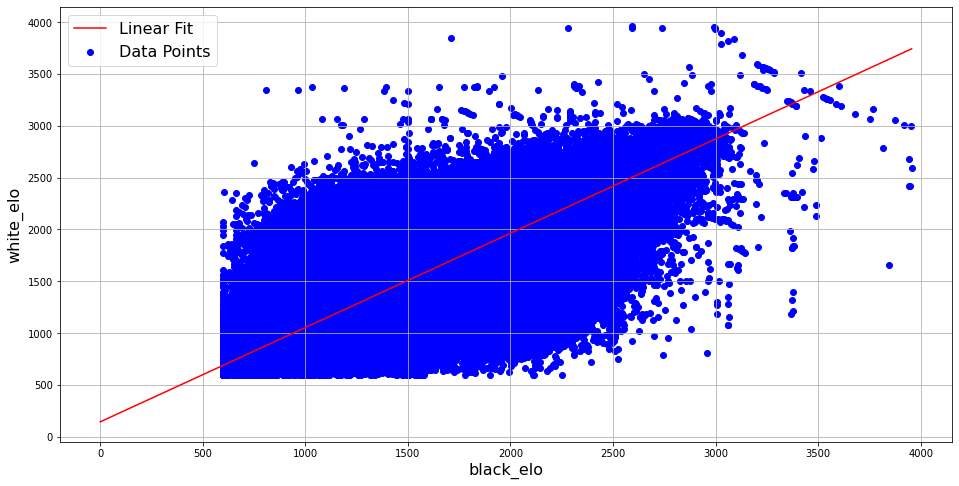

In [ ]:
black_elo =(df['BlackElo'])
white_elo =(df['WhiteElo'])

pearsonr, _ = stats.pearsonr(black_elo,white_elo)
print("Pearson's Coeff: ", pearsonr,"\n\n")

fitLine(black_elo,white_elo,'black_elo','white_elo',1)

So, conclusion is that player mostly plays against the player with similar ratings.

# Correlation of inferior moves with Elo Rating

<Figure size 576x576 with 0 Axes>

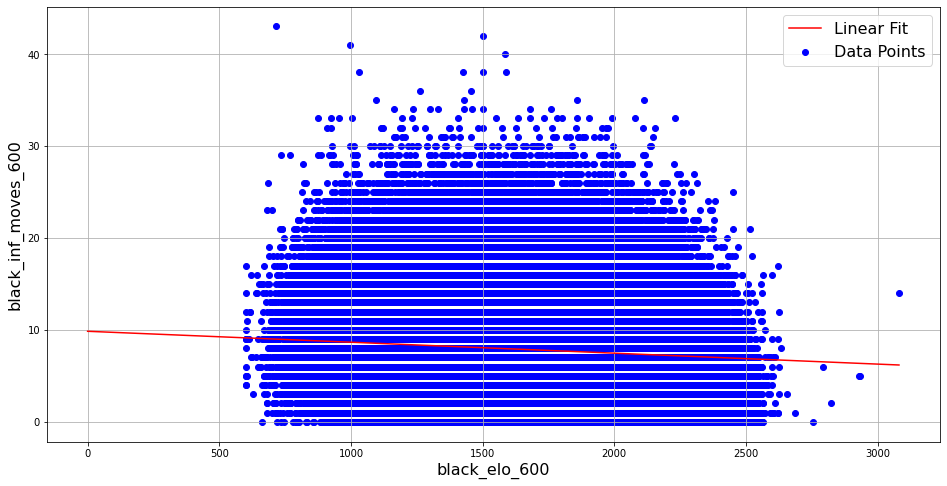

Pearson's Coeff:  -0.08305776634250892


In [ ]:
df_elo_600 = df[df["TimeControl"]=="600+0"]
black_elo_600 = df_elo_600["WhiteElo"]
black_inf_moves_600 = df_elo_600["White_inferior_moves"]

plt.figure(figsize=(8,8))
fitLine(black_elo_600,black_inf_moves_600,"black_elo_600","black_inf_moves_600",1)

pearsonr, _ = stats.pearsonr(black_elo_600,black_inf_moves_600)
print("Pearson's Coeff: ", pearsonr)

**r** is around 0, so we can say that even if the rating is high then also it does not means that inferior moves will also be less, inferios moves can also be done by player with high rating

# Elo Ratings and Gametype

In [ ]:
df["Game_type"].unique()

array(['Blitz', 'Rapid', 'Bullet', 'Classical', 'Correspondence'],
      dtype=object)

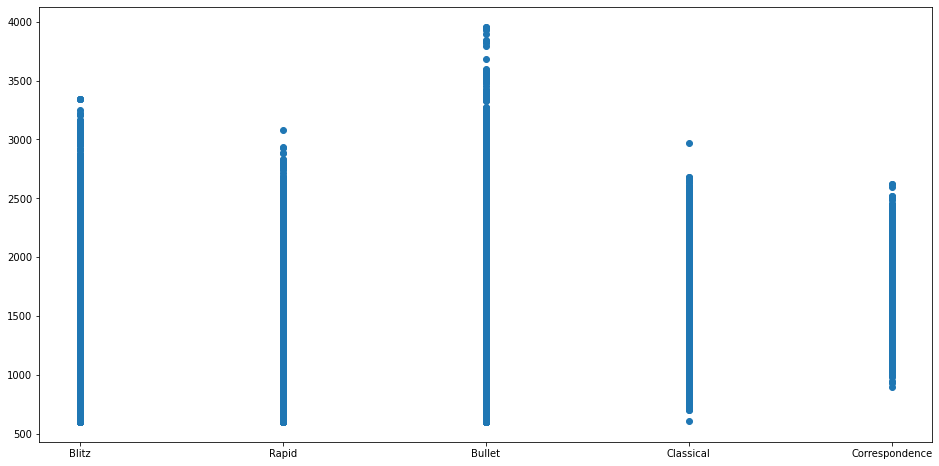

In [ ]:
plt.figure(figsize=(16,8))
plt.scatter(df["Game_type"],df["WhiteElo"])

Overall higest ratings are in Bullet Games, lowest in the Correspondence game

# Total moves vs Inferior moves

Pearson's Coeff:  0.5563841285514208 




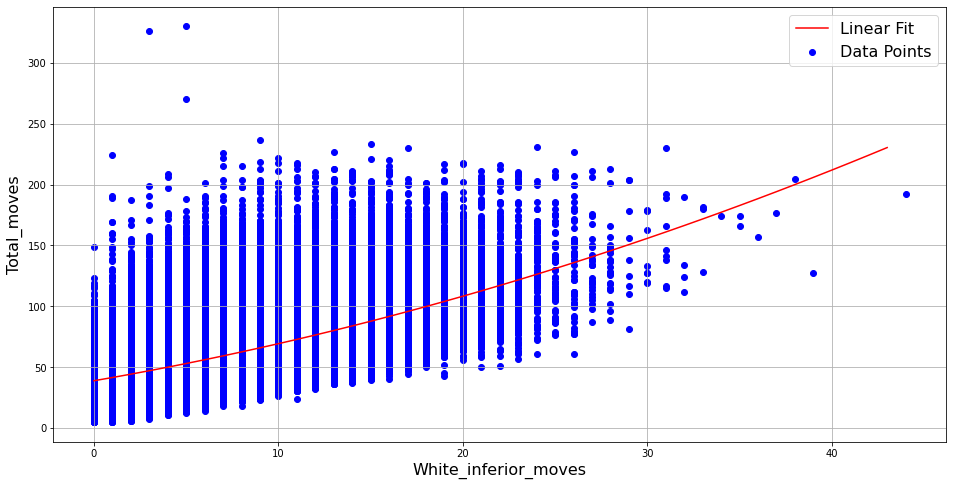

In [ ]:
df_elo_300 = df[df["TimeControl"]=="120+1"]
black_elo_600 = df_elo_300["White_inferior_moves"]
black_inf_moves_600 = df_elo_300["Total_moves"]

pearsonr, _ = stats.pearsonr(black_elo_600,black_inf_moves_600)
print("Pearson's Coeff: ", pearsonr,"\n\n")

fitLine(black_elo_600,black_inf_moves_600,"White_inferior_moves","Total_moves",2)

#Some General Concusions

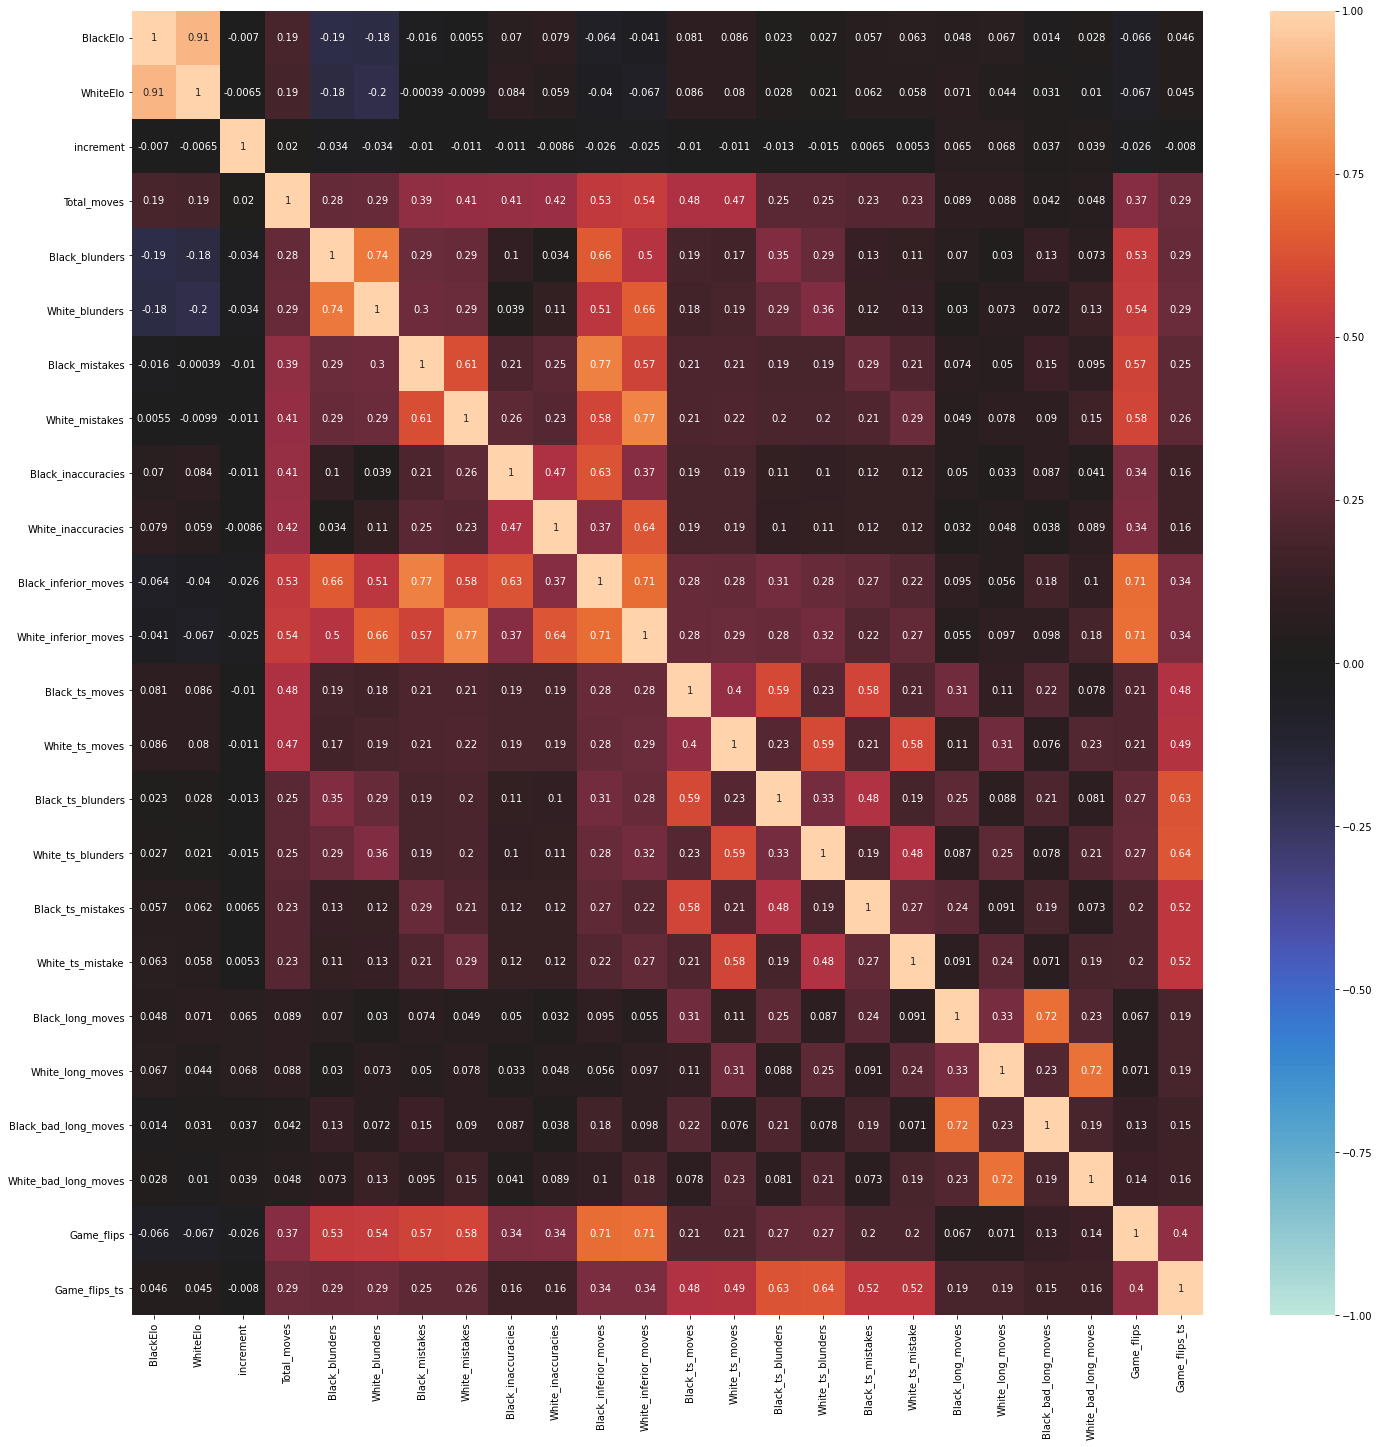

In [ ]:
corrs = df[['BlackElo','WhiteElo', 'increment', 'Game_type',
       'Total_moves', 'Black_blunders', 'White_blunders', 'Black_mistakes',
       'White_mistakes', 'Black_inaccuracies', 'White_inaccuracies',
       'Black_inferior_moves', 'White_inferior_moves', 'Black_ts_moves',
       'White_ts_moves', 'Black_ts_blunders', 'White_ts_blunders',
       'Black_ts_mistakes', 'White_ts_mistake', 'Black_long_moves',
       'White_long_moves', 'Black_bad_long_moves', 'White_bad_long_moves',
       'Game_flips', 'Game_flips_ts']].corr()

f, ax = plt.subplots(figsize=(24, 24))
sns.color_palette("magma", as_cmap=True)
sns.heatmap(corrs,
            xticklabels = corrs.columns.values,
            yticklabels = corrs.columns.values,
            annot = True, vmax=1, vmin=-1, center=0)
plt.show()


- Player mostly plays against the player with rating around him/her 

- Both the players mostly do same number of blunders during the game

- Total moves has fuzzy linear relatioship with total inferior moves, more moves chance to do more inferior moves.

- Chances of Game flips increases if player do more inferior moves

- Because of less time, and moves during that time increases the chance to do more blunders and mistakes

- Long moves have strong linear relationship with Long Bad moves, means more time you spend on move more chance to turn out it to be bad move

- Game Flips with or without time scrumbling, can happen with players with any rating, Game flips does not depend on players rating

- Game Flips because of less time is fuzzily related with time scrumble moves